__BLACK FRIDAY SALE__

Motivation:
Last year my friend got shifted to US. From her I got to hear a lot on excitement of black friday sale around christmas. Just got curious to analyse the amount of benefitts it would impose both for sellers and buyers, hence thought of exploring this data which I came across in kaggle.

__DATASET:__ BlackFriday.csv from kaggle

__BUSINESS QUESTIONS__
Will be following CRISP_DM steps in this project. I would like derive insights on below points with the help of this data set.

Question 1: Top spender of black friday, listing the top 10 spending users

Question 2: Understanding age group distribution of spenders

Question 3: Which are the most popular products, list the top 10 amonst them

Question 4: Observing correlation between Purchase  and (Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_x)


In [1]:
#Having all nessacary libraries imported
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Understanding Data
BF_CompleteData = pd.read_csv('./BlackFriday.csv')
BF_CompleteData.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
BF_CompleteData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
rows = BF_CompleteData.shape[0] #Total rows in data set
cols = BF_CompleteData.shape[1] #Total columns in data set
print("Number of rows: {}".format(rows))
print("Number of columns: {}".format(cols))

Number of rows: 537577
Number of columns: 12


__Preparing Data__

Here we do data wrangling to make it ready for further exploration:

Checking columns with missing & dealing with it and do impact analysis of removing these values.
One-Hot Encoding for Categorical variables (Gender, Age, City_Category, Stay_in_curent_City_Years).

In [5]:
#Missing values in data set
BF_CompleteData.isnull().sum()
#BF_CompleteData.describe()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

From above data we can infer that two columns have missing values 'Product_Category_2' and 'Product_Category_3' meaning shoppers dint purchage anything in these 2 categories. Hence I would replace it with numerical value 0

In [6]:
BF_CompleteData.fillna(0)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


In [7]:
#One-Hot encoding of following categorical features:Age, City_Category, Gender,Stay_in_curent_City_Years
label = LabelEncoder()
BF_CompleteData['Age_oneencode'] = label.fit_transform(BF_CompleteData['Age'].astype(str))
BF_CompleteData['City_Category_oneencode'] = label.fit_transform(BF_CompleteData['City_Category'].astype(str))
BF_CompleteData['Gender_oneencode'] = label.fit_transform(BF_CompleteData['Gender'].astype(str))
BF_CompleteData['Stay_in_curent_City_Years_oneencode'] = label.fit_transform(BF_CompleteData['Stay_In_Current_City_Years'].astype(str))


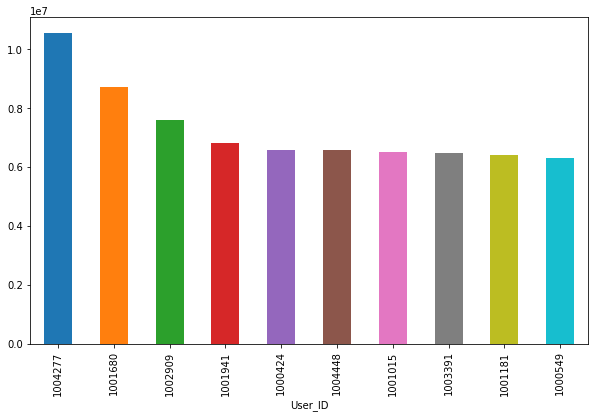

In [8]:
#Question 1: Top spender of black friday, listing the top 10 spending users
# total purchase done by each user
user_total_purchase = BF_CompleteData.groupby('User_ID')['Purchase'].sum()
#Top 10 purchasers
top10_users = user_total_purchase.nlargest(10)
plt.figure(figsize = (10,6))
top10_users.plot(kind = 'bar')

This is a helpful insight where seller can identify their top customers and study the pattern of the purchases made by them. 
It will help sellers to make usefull business changes in areas eg: product's price , kind of products sold etc.  Also to make the users regular customers special user benefit programs can be launched.

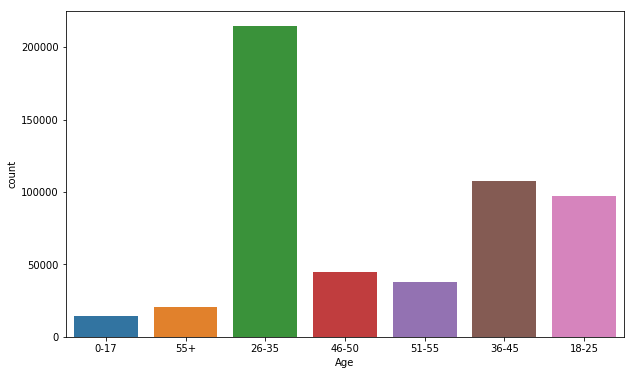

In [9]:
#Question 2: Understanding age group distribution of spenders
plt.figure(figsize = (10,6))
sns.countplot(BF_CompleteData['Age'])

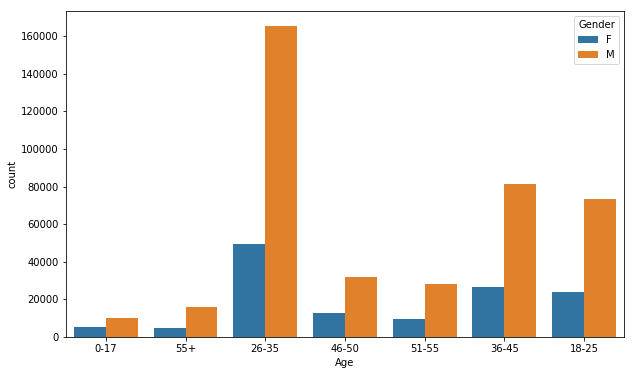

In [10]:
#Plotting age distribution based on gender
plt.figure(figsize = (10,6))
sns.countplot(BF_CompleteData['Age'], hue = BF_CompleteData['Gender'])

Above plot shows 2 pattern:
1. Maximum users shopping on black friday belong to age group of '26-35', '36-45', '18-25'. These group people are mostly collage goers and people with job hence have more shopping requirements.
2. Also pattern shows that males tend to shop more as compared to females, reason can be infered as electronic goods are most preferred products to be bought during black friday sales seeing majority of male customers for it.

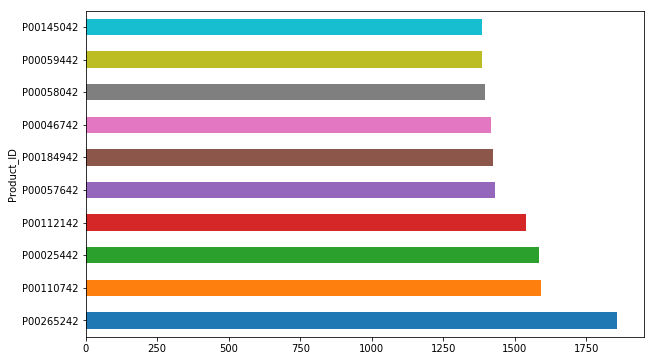

In [19]:
# Which are the most popular products, list the top 10 amonst them
plt.figure(figsize=(10,6))
#total purchase per product
product_purchase_count = BF_CompleteData.groupby('Product_ID')['Purchase'].count()
#product_purchase_count
top10_prod = product_purchase_count.nlargest(10)
#top10_prod.plot('pie')
top10_prod.plot('barh')

The above analysis can help the sellers to keep in stock their high selling products, stocking smilar products 
and derive further insights like promotions of low selling products etc.

In [21]:
BF_CompleteData.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_oneencode,City_Category_oneencode,Gender_oneencode,Stay_in_curent_City_Years_oneencode
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853,2.494755,1.040567,0.754087,1.859458
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133,1.352583,0.759627,0.430627,1.289828
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000,2.000000,0.000000,1.000000,1.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000,2.000000,1.000000,1.000000,2.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000,3.000000,2.000000,1.000000,3.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000,6.000000,2.000000,1.000000,4.000000


In [22]:
#Question 4: Observing correlation between Purchase and (Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_x)
correlation_data = BF_CompleteData[['Gender_oneencode', 'Age_oneencode', 'Occupation', 'City_Category_oneencode', 
    'Stay_in_curent_City_Years_oneencode', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]
correlation_data.corr()

,Gender_oneencode,Age_oneencode,Occupation,City_Category_oneencode,Stay_in_curent_City_Years_oneencode,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender_oneencode,1.000000,-0.004413,0.117294,-0.004129,0.015392,-0.010379,-0.045661,-0.018440,0.028403,0.060086
Age_oneencode,-0.004413,1.000000,0.091898,0.122308,-0.004754,0.312079,0.061951,0.054762,0.057155,0.017717
Occupation,0.117294,0.091898,1.000000,0.033781,0.031203,0.024691,-0.008114,-0.000031,0.013452,0.021104
City_Category_oneencode,-0.004129,0.122308,0.033781,1.000000,0.019948,0.040173,-0.027444,-0.012120,-0.002672,0.068507
Stay_in_curent_City_Years_oneencode,0.015392,-0.004754,0.031203,0.019948,1.000000,-0.012663,-0.004182,-0.001781,0.002039,0.005470
Marital_Status,-0.010379,0.312079,0.024691,0.040173,-0.012663,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,-0.045661,0.061951,-0.008114,-0.027444,-0.004182,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,-0.018440,0.054762,-0.000031,-0.012120,-0.001781,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.028403,0.057155,0.013452,-0.002672,0.002039,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.060086,0.017717,0.021104,0.068507,0.005470,0.000129,-0.314125,-0.209973,-0.022257,1.000000


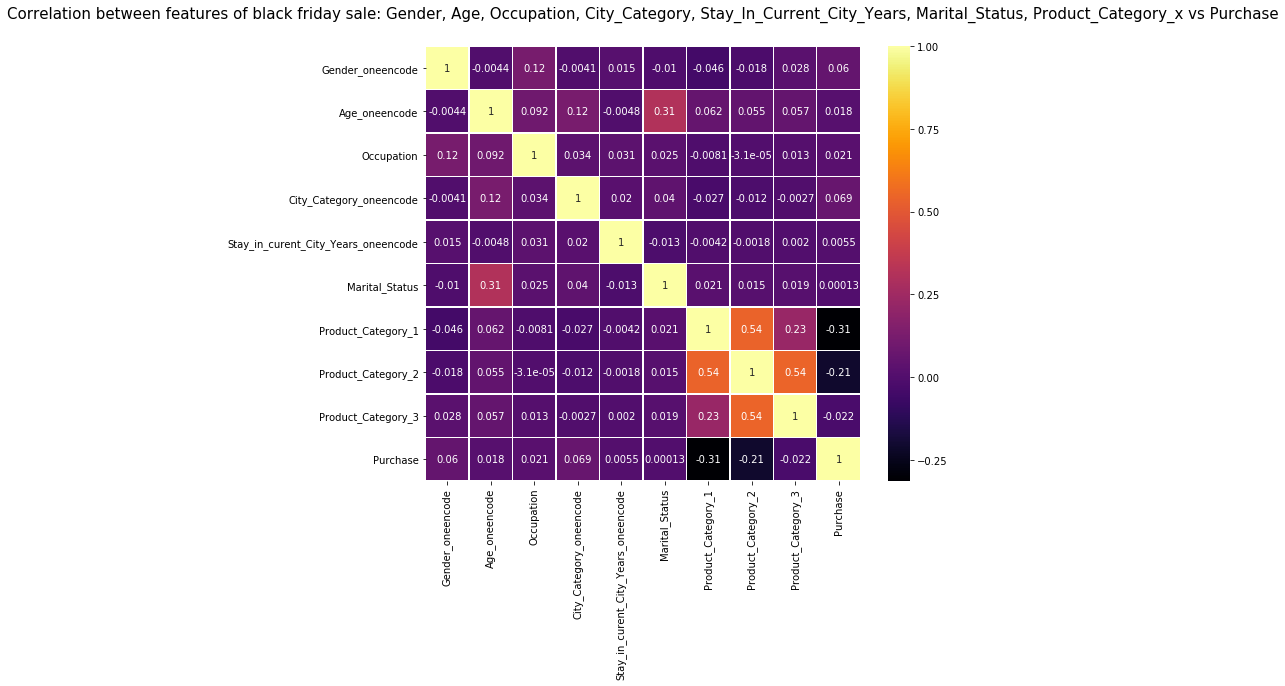

In [24]:
plot_colormap = plt.cm.inferno
plt.figure(figsize=(10,8))
plt.title('Correlation between features of black friday sale: Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_x vs Purchase', y=1.05, size=15)
sns.heatmap(correlation_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plot_colormap, linecolor='white', annot=True)

From the above correlation map, we can conclude the following:
1. POSITIVE:  Gender & City_Category are most postive related to Purchase comparing to other features.
2. NEGATIVE: All Product_Category features are negative related to Purchase.
3. Marital_Status, Stay_In_Current_City_Years are not so important features that relate to Purchase.
4. All three Product_Category are highly correlated to each other. Besides that, we can also find that Martital_Status are highly related to Age, which is quite reasonable.